In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.oauth2 import service_account
from google.cloud import bigquery

key_path = 'insert your credentials/path'

credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)

# Download query results.
query = """
SELECT
  *
FROM
  `project_id.nypd_mv_collisions.nymvcollisions`
WHERE
 borough='BROOKLYN'
ORDER BY 
timestamp
DESC;
"""
results = client.query(query)

nyc_collisions = results.to_dataframe()

In [2]:
#nyc_collisions = pd.read_csv("nyc_mv_collisions.csv")

In [3]:
print(nyc_collisions.shape)

(1806302, 28)


In [4]:
nyc_collisions.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
0,BROOKLYN,Unspecified,Unspecified,NaN,NaN,NaN,FORT HAMILTON PARKWAY,2021-05-07 18:30:00,40.616960,-74.027510,...,0.0,NaN,92 STREET,4414269,Sedan,Motorcycle,NaN,NaN,NaN,11209.0
1,BRONX,Traffic Control Disregarded,Unspecified,NaN,NaN,NaN,BRUCKNER BOULEVARD,2021-05-13 19:31:00,40.820305,-73.890830,...,0.0,NaN,HUNTS POINT AVENUE,4416566,Station Wagon/Sport Utility Vehicle,Motorcycle,NaN,NaN,NaN,10459.0
2,BRONX,Unspecified,Unspecified,NaN,NaN,NaN,PROSPECT AVENUE,2021-05-21 19:48:00,40.829422,-73.897575,...,0.0,NaN,EAST 169 STREET,4419175,E-Bike,Motorbike,NaN,NaN,NaN,10459.0
3,QUEENS,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,57 AVENUE,2021-06-11 16:54:00,40.727850,-73.926570,...,0.0,NaN,43 STREET,4425923,Sedan,Carry All,NaN,NaN,NaN,11378.0
4,BROOKLYN,Failure to Yield Right-of-Way,Driver Inattention/Distraction,NaN,NaN,NaN,BAY 8 STREET,2021-06-11 12:14:00,40.611850,-74.010254,...,0.0,NaN,86 STREET,4425897,Pick-up Truck,E-Bike,NaN,NaN,NaN,11228.0


In [5]:
print(nyc_collisions.columns)

Index(['borough', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'cross_street_name', 'timestamp', 'latitude', 'longitude', 'location',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_persons_injured', 'number_of_persons_killed',
       'off_street_name', 'on_street_name', 'unique_key', 'vehicle_type_code1',
       'vehicle_type_code2', 'vehicle_type_code_3', 'vehicle_type_code_4',
       'vehicle_type_code_5', 'zip_code'],
      dtype='object')


In [6]:
nyc_collisions.dtypes

borough                           object
contributing_factor_vehicle_1     object
contributing_factor_vehicle_2     object
contributing_factor_vehicle_3     object
contributing_factor_vehicle_4     object
contributing_factor_vehicle_5     object
cross_street_name                 object
timestamp                         object
latitude                         float64
longitude                        float64
location                          object
number_of_cyclist_injured          int64
number_of_cyclist_killed           int64
number_of_motorist_injured         int64
number_of_motorist_killed          int64
number_of_pedestrians_injured      int64
number_of_pedestrians_killed       int64
number_of_persons_injured        float64
number_of_persons_killed         float64
off_street_name                   object
on_street_name                    object
unique_key                         int64
vehicle_type_code1                object
vehicle_type_code2                object
vehicle_type_cod

In [7]:
nyc_collisions.rename(columns={'contributing_factor_vehicle_1': 'c.factor_1', 
                               'contributing_factor_vehicle_2': 'c.factor_2',
                               'contributing_factor_vehicle_3': 'c.factor_3',
                               'contributing_factor_vehicle_4': 'c.factor_4', 
                               'contributing_factor_vehicle_5': 'c.factor_5',
                               'number_of_cyclist_injured': 'cyclist_injured',
                               'number_of_cyclist_killed': 'cyclist_killed',
                               'number_of_motorist_injured':'motorist_injured',
                               'number_of_motorist_killed':'motorist_killed',
                               'number_of_pedestrians_injured':'pedastrians_injured',
                               'number_of_pedestrians_killed':'pedastrians_killed',
                               'number_of_persons_injured':'persons_injured',
                               'number_of_persons_killed':'persons_killed',
                               'vehicle_type_code1': 'v.type_code1',
                               'vehicle_type_code2': 'v.type_code2',
                               'vehicle_type_code_3':'v.type_code3',
                               'vehicle_type_code_4':'v.type_code4',
                               'vehicle_type_code_5':'v.type_code5',
                               'zip_code':'zip'}, inplace=True)

In [8]:
nyc_collisions["timestamp"] = pd.to_datetime(nyc_collisions["timestamp"])
nyc_collisions['year'] = nyc_collisions['timestamp'].dt.year
nyc_collisions['month'] = nyc_collisions['timestamp'].dt.month
nyc_collisions["week_of_year"] = nyc_collisions["timestamp"].dt.isocalendar().week
nyc_collisions['weekday'] = nyc_collisions['timestamp'].dt.weekday
nyc_collisions["weekday_name"]= nyc_collisions["timestamp"].dt.strftime('%A')
nyc_collisions['day'] = nyc_collisions['timestamp'].dt.day
nyc_collisions["hour"] = nyc_collisions["timestamp"].dt.hour

In [9]:
missing_values = pd.isna(nyc_collisions).sum().reset_index()
missing_values["pct"] = [round(100*x/nyc_collisions.shape[0],2) for x in missing_values[0]]
missing_values

,index,0,pct
0,borough,556850,30.83
1,c.factor_1,5128,0.28
2,c.factor_2,258991,14.34
3,c.factor_3,1683613,93.21
4,c.factor_4,1779633,98.52
5,c.factor_5,1799282,99.61
6,cross_street_name,643614,35.63
7,timestamp,0,0.00
8,latitude,212202,11.75
9,longitude,212202,11.75


In [10]:
cols_to_be_removed = missing_values[missing_values["pct"]>50]["index"]

In [11]:
nyc_collisions.drop(columns=cols_to_be_removed, inplace=True)

We see that a lot of columns have missing values more than 80%. So let's remove those columns which have more than 50% missing values

In [12]:
#updated dataframe's shape 
nyc_collisions.shape

(1806302, 28)

In [13]:
#Per borough accidents 
nyc_collisions.borough.value_counts(dropna=False)

NaN              556850
BROOKLYN         392729
QUEENS           334563
MANHATTAN        288749
BRONX            180604
STATEN ISLAND     52807
Name: borough, dtype: int64

We find that nearly 31% of values for borough are missing.
we will use the data of lat, long, location to find the missing borough

In [14]:
#import googlemaps
#gmaps = googlemaps.Client(key='insert your key')

#New data frame where lat-long info is available and borough,zip code details are missing:

#df = nyc_collisions[nyc_collisions.borough.isna() & (~nyc_collisions.location.isna())].reset_index()
#df.drop(columns='index', inplace=True)

#def get_borough(df):
#    reverse_geocode_result = gmaps.reverse_geocode((df.latitude,df.longitude))
#    if reverse_geocode_result:
 #       df['borough'] = reverse_geocode_result[0]['address_components'][3]['short_name'].upper()
#    return df


#df1 = df.drop_duplicates(subset=['latitude','longitude']).reset_index()
#df1.drop(columns='index',inplace=True)

#df2 = df1.apply(get_borough, axis=1)

In [15]:
nyc_collisions['persons_injured'] = nyc_collisions['persons_injured'].fillna(value=0)
nyc_collisions['persons_killed'] = nyc_collisions['persons_killed'].fillna(value=0)
print(min(nyc_collisions['timestamp']), ' ', max(nyc_collisions['timestamp']))
#We got nearly 9 years of data and in 2012 for 6 months. So lets consider from full year 2013.
#However 2021 has only 7 months of data but considering its recency we will include that

2012-07-01 00:05:00   2021-07-31 23:53:00


In [16]:
nyc_collisions = nyc_collisions[nyc_collisions.year>2012]

#Ignore the records which don't have either ZIP or Location details
nyc_collisions = nyc_collisions[nyc_collisions.location.isna() == False]

nyc_collisions = nyc_collisions[nyc_collisions.zip.isna() == False]

In [17]:
print ("The updated dataframe has the shape:", nyc_collisions.shape)

The updated dataframe has the shape: (1139349, 28)


In [18]:
nyc_collisions.drop(columns=['latitude', 'longitude','zip'], inplace=True)

In [19]:
nyc_collisions= nyc_collisions.astype({'persons_injured': 'int64', 'persons_killed': 'int64', 
                                       'c.factor_1':'category', 'c.factor_2':'category', 
                                        'borough': 'category',
                                        'weekday_name':'category'})

In [20]:
#updated datatypes
nyc_collisions.dtypes

borough                      category
c.factor_1                   category
c.factor_2                   category
cross_street_name              object
timestamp              datetime64[ns]
location                       object
cyclist_injured                 int64
cyclist_killed                  int64
motorist_injured                int64
motorist_killed                 int64
pedastrians_injured             int64
pedastrians_killed              int64
persons_injured                 int64
persons_killed                  int64
on_street_name                 object
unique_key                      int64
v.type_code1                   object
v.type_code2                   object
year                            int64
month                           int64
week_of_year                   UInt32
weekday                         int64
weekday_name                 category
day                             int64
hour                            int64
dtype: object

In [21]:
numeric_columns = ['cyclist_injured', 'cyclist_killed','motorist_injured', 'motorist_killed', 
                   'pedastrians_injured', 'pedastrians_killed', 'persons_injured', 'persons_killed'] 

nyc_collisions[numeric_columns].describe()

,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,pedastrians_injured,pedastrians_killed,persons_injured,persons_killed
count,1.139349e+06,1.139349e+06,1.139349e+06,1.139349e+06,1.139349e+06,1.139349e+06,1.139349e+06,1.139349e+06
mean,2.666962e-02,9.830175e-05,1.764130e-01,3.765308e-04,6.015014e-02,6.565153e-04,2.640280e-01,1.137492e-03
std,1.626774e-01,1.000238e-02,5.946606e-01,2.088235e-02,2.518060e-01,2.639051e-02,6.442115e-01,3.563156e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+00,2.000000e+00,4.300000e+01,4.000000e+00,2.700000e+01,6.000000e+00,4.300000e+01,8.000000e+00


EDA

In [22]:
#nyc_collisions.to_csv('updated_nyc_collisions_file.csv', index=False)

In [23]:
def lineplots(data,groupby_rows,metric,x_axis,y_axis,xlabel,ylabel,variable = None,axis_ticks_size = 12,axis_label_size=12,Title = None,Title_size=12):
    plt.figure(figsize=(18,8))
    # plt.subplot(2,1,1)
    data=data.groupby(groupby_rows,as_index=False)[metric].count()
    sns.lineplot(data = data, x = x_axis, y = y_axis,hue = variable, markers= True,style = variable, size = variable)
    plt.xlabel(xlabel,fontsize=axis_label_size)
    plt.ylabel(ylabel,fontsize=axis_label_size)
    plt.xticks(fontsize=axis_ticks_size)
    plt.yticks(fontsize=axis_ticks_size)
    plt.title(Title,fontsize=Title_size)

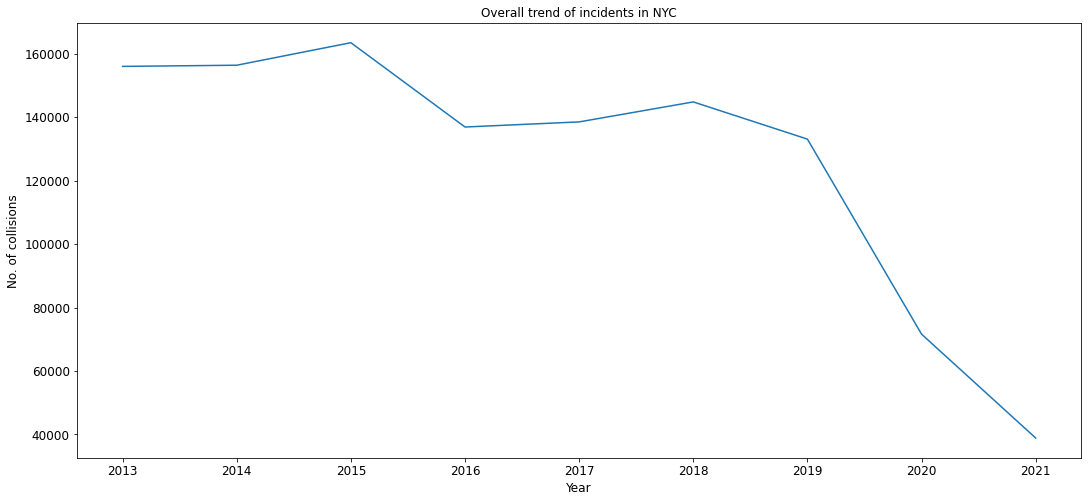

In [24]:
lineplots(data=nyc_collisions,groupby_rows=['year'],metric= 'unique_key',
          x_axis='year',y_axis='unique_key',xlabel='Year',ylabel='No. of collisions',
          Title = "Overall trend of incidents in NYC")

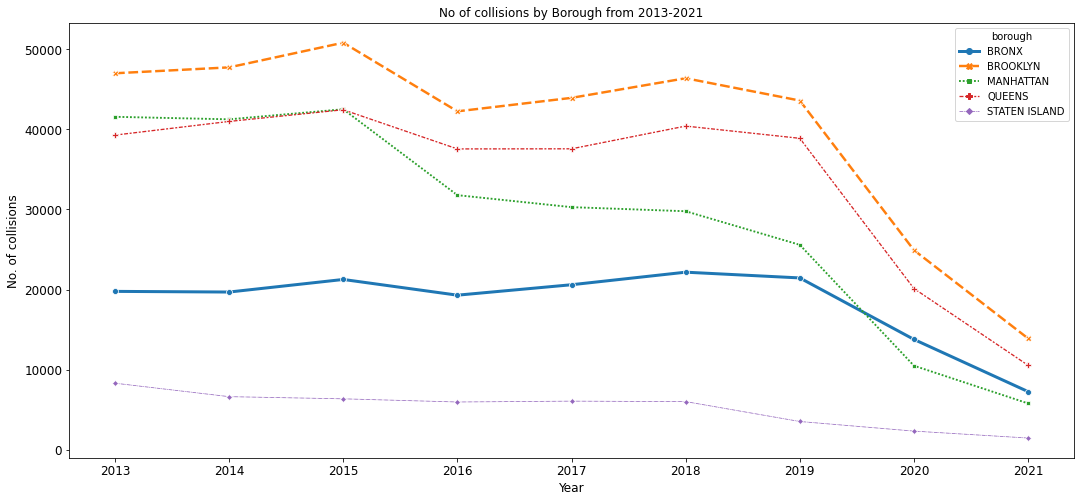

In [25]:
lineplots(data=nyc_collisions,groupby_rows=['borough','year'],metric= 'unique_key',
          x_axis='year',y_axis='unique_key',variable='borough',xlabel='Year',ylabel='No. of collisions', 
          Title ='No of collisions by Borough from 2013-2021')

We see that the overall trend of collision incidents have been decreasing across the years including Brooklyn. 
The huge dip in collisions from 2019-20 could be attributed to lockdown because of COVID 19 impact.
Per Borough level - Brooklyn tops the borough in terms of collision incidents but the best practices could be learnt from
Manhattan that had drastically reduced the incidents from 40k in 2013 to approx 10k in 2021
Also, Staten Island that had been very consistent in recording the incidents around 10k every year. Though the fatality is slightly higher than the other boroughs.

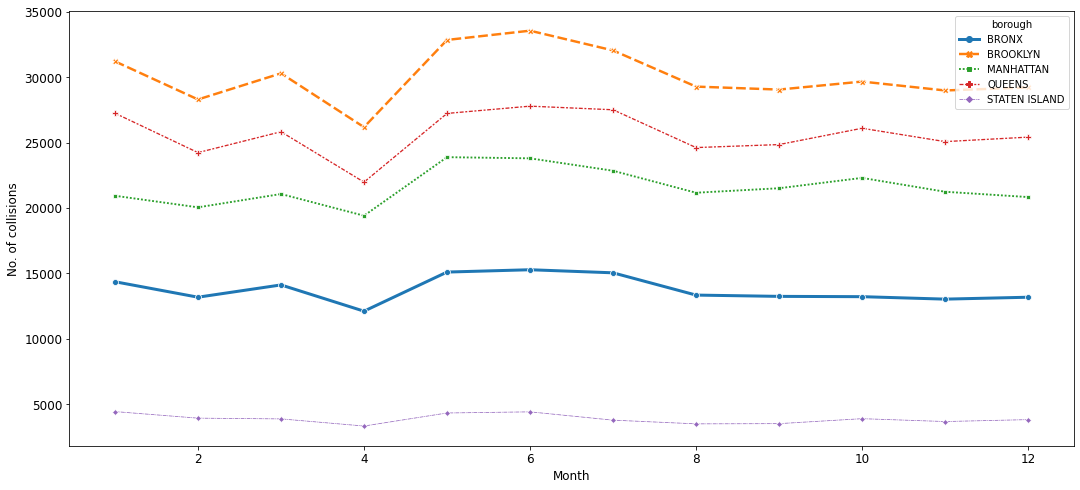

In [26]:
lineplots(data=nyc_collisions,groupby_rows=['borough','month'],metric= 'unique_key',
          x_axis='month',y_axis='unique_key',variable='borough',xlabel='Month',ylabel='No. of collisions');

Across all the boroughs spring,summer months (April-Aug) is when most incidents occur. This is due to the fact that during summer, people like to travel/ commute/ go out

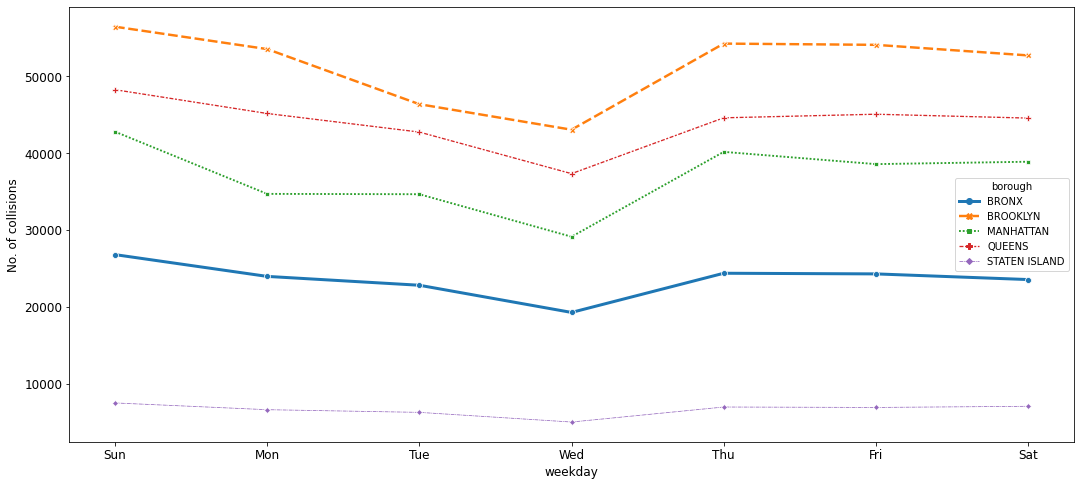

In [27]:
lineplots(data=nyc_collisions,groupby_rows=['borough','weekday_name'],metric= 'unique_key',
          x_axis='weekday_name',y_axis='unique_key',variable='borough',xlabel='weekday',ylabel='No. of collisions')
plt.xticks(np.sort(nyc_collisions.weekday_name.unique()),
           ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'));

We see that the incidents are higher during the weekends. (Sun and Sat, beginning from Friday)
Mid week - Wednesday the incidents are lower. 

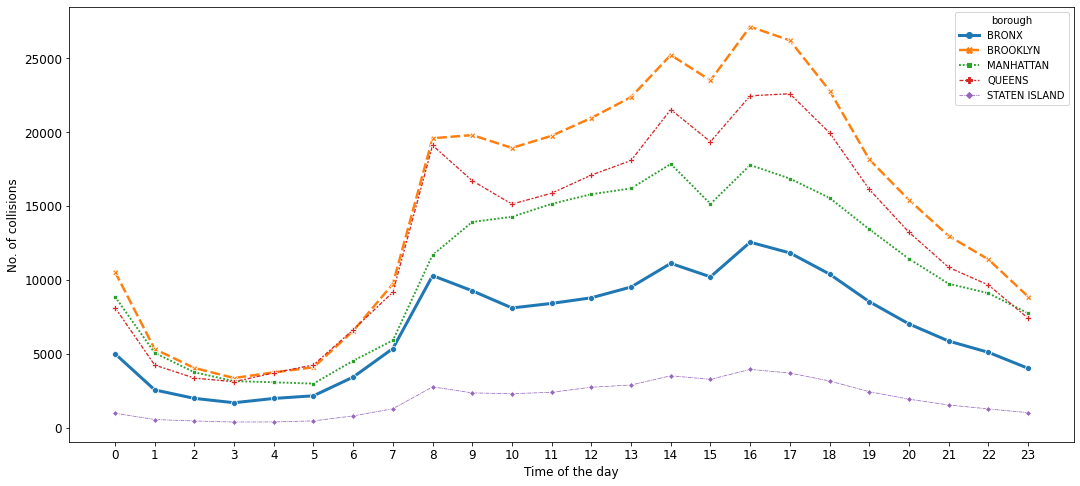

In [28]:
lineplots(data=nyc_collisions,groupby_rows=['borough','hour'],metric= 'unique_key',
          x_axis='hour',y_axis='unique_key',variable='borough',xlabel='Time of the day',ylabel='No. of collisions')
plt.xticks(np.sort(nyc_collisions.hour.unique()));

As expected, midnight & early hours - the incidents are lower. 
The peak duration is between 2-6 PM 
Though there were a lot of incidents recorded in the morning hours (when people could travel to work), it is not as higher as evening

In [29]:
is_fatal = []

for i in nyc_collisions['persons_killed']:
    if i >0: is_fatal.append(True)
    else: is_fatal.append(False)
        
        
nyc_collisions['is_fatal'] = is_fatal

In [30]:
nyc_collisions[nyc_collisions['is_fatal'] == True].shape

(1252, 26)

In [33]:
fatality = nyc_collisions[nyc_collisions['is_fatal'] == True].shape[0] 
incidents = nyc_collisions.shape[0]
fatality_rate = round(100*(fatality/incidents),2)
print("There have been {} incidents where at-least one person died".format(fatality))
print('The fatality rate is {} %'.format(fatality_rate))

There have been 1252 incidents where at-least one person died
The fatality rate is 0.11 %


In [34]:
brooklyn =  nyc_collisions[nyc_collisions['borough'] =='BROOKLYN']
brooklyn = brooklyn.reset_index()
brooklyn.drop(columns='index', inplace=True)

print("Brooklyn only data:", brooklyn.shape)

no_brooklyn = nyc_collisions[nyc_collisions["borough"] != "BROOKLYN"]
no_brooklyn = no_brooklyn.reset_index()
no_brooklyn.drop(columns='index', inplace=True)

print("Other Boroughs:",no_brooklyn.shape)

Brooklyn only data: (360650, 26)
Other Boroughs: (778699, 26)


In [35]:
fatality = brooklyn[brooklyn['is_fatal'] == True].shape[0] 
incidents = brooklyn.shape[0]
fatality_rate = round(100*(fatality/incidents),2)
print("There have been {} incidents where at-least one person died".format(fatality))
print('The fatality rate is {} %'.format(fatality_rate))

There have been 426 incidents where at-least one person died
The fatality rate is 0.12 %


In [36]:
contri_factors1 = brooklyn.groupby(['c.factor_1']).count()[["unique_key"]].sort_values(by='unique_key',ascending=False)
contri_factors1.head(10)

,unique_key
c.factor_1,
Unspecified,153041
Driver Inattention/Distraction,59973
Failure to Yield Right-of-Way,23513
Backing Unsafely,15206
Following Too Closely,11641
Passing Too Closely,10116
Other Vehicular,8088
Passing or Lane Usage Improper,8060
Fatigued/Drowsy,6892


In [37]:
contri_factors2 = brooklyn.groupby("c.factor_2").count()[["unique_key"]].sort_values(by='unique_key',ascending=False)
contri_factors2.head(10)

,unique_key
c.factor_2,
Unspecified,267450
Driver Inattention/Distraction,11648
Other Vehicular,3537
Failure to Yield Right-of-Way,2846
Following Too Closely,1686
Passing or Lane Usage Improper,1647
Fatigued/Drowsy,1559
Backing Unsafely,1454
Traffic Control Disregarded,1339


<AxesSubplot:xlabel='v.type_code1'>

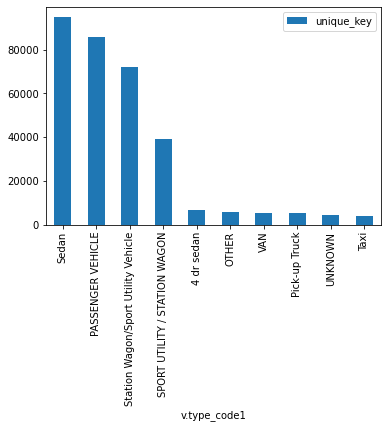

In [38]:
vehicle_1 = brooklyn.groupby("v.type_code1").count()[["unique_key"]].sort_values(by='unique_key',ascending=False)
vehicle_1.head(10).plot.bar()

<AxesSubplot:xlabel='v.type_code2'>

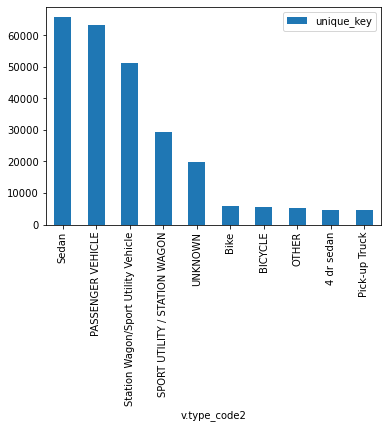

In [39]:
vehicle_2 = brooklyn.groupby("v.type_code2").count()[["unique_key"]].sort_values(by='unique_key',ascending=False)
vehicle_2.head(10).plot.bar()

In [40]:
pd.pivot_table(brooklyn, values=["cyclist_injured","motorist_injured", "pedastrians_injured" ,"persons_injured"], 
               index=["c.factor_1"], aggfunc=np.sum).sort_values(by="persons_injured",ascending=False).head(15)

,cyclist_injured,motorist_injured,pedastrians_injured,persons_injured
c.factor_1,,,,
Unspecified,4233,26924,10194,41428
Driver Inattention/Distraction,2532,12689,3926,19238
Failure to Yield Right-of-Way,1505,6177,4051,11771
Traffic Control Disregarded,422,3459,286,4197
Following Too Closely,158,3633,37,3839
Other Vehicular,187,1736,139,2070
Unsafe Speed,107,1653,189,1956
Fatigued/Drowsy,82,1774,42,1899
Backing Unsafely,71,768,916,1759


In [41]:
pd.pivot_table(brooklyn, values=["cyclist_injured","motorist_injured", "pedastrians_injured" ,"persons_injured"], 
               index=["v.type_code1"], aggfunc=np.sum).sort_values(by="persons_injured",ascending=False).head(15)

,cyclist_injured,motorist_injured,pedastrians_injured,persons_injured
v.type_code1,,,,
Sedan,2486,21142,5033,28751
PASSENGER VEHICLE,2438,18269,5191,25898
Station Wagon/Sport Utility Vehicle,1998,14417,4406,20881
SPORT UTILITY / STATION WAGON,1118,7676,2813,11607
Bike,1965,22,237,2223
UNKNOWN,388,302,1241,1931
4 dr sedan,175,1387,288,1844
Taxi,148,1205,303,1664
VAN,133,768,372,1273


<AxesSubplot:xlabel='weekday'>

<Figure size 1440x1080 with 0 Axes>

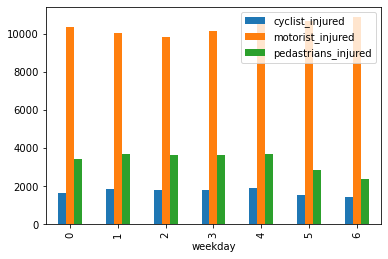

In [42]:
plt.figure(figsize=(20,15))
pd.pivot_table(brooklyn, values=["cyclist_injured","motorist_injured", "pedastrians_injured"], 
               index=["weekday"], aggfunc=np.sum).sort_values(by="weekday").plot.bar()

In Brooklyn,

* The pedastrians are injured in lower number during weekend
* The motorists get injured higher during the weekend

<AxesSubplot:xlabel='weekday'>

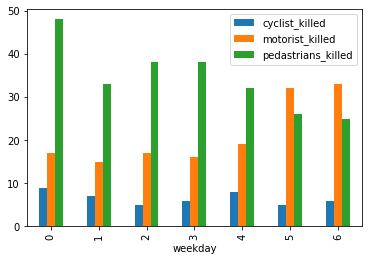

In [43]:
pd.pivot_table(brooklyn, values=["cyclist_killed","motorist_killed", "pedastrians_killed" ], 
               index=["weekday"], aggfunc=np.sum).sort_values(by="weekday").plot.bar()

In Brooklyn, 
* Motorists are killed higher in number during the weekend. (Higher from Friday-Sunday) which could be higher usage of vehicles during the weekend 
* Pedastrians are killed highest in Monday & higher in other weekdays


In [44]:
pd.pivot_table(brooklyn, values=["persons_killed"], 
               index=["v.type_code1"], aggfunc=np.sum).sort_values(by="persons_killed",ascending=False).head(10)

,persons_killed
v.type_code1,
PASSENGER VEHICLE,84
Station Wagon/Sport Utility Vehicle,67
SPORT UTILITY / STATION WAGON,62
Sedan,60
Motorcycle,20
Box Truck,12
BUS,12
LARGE COM VEH(6 OR MORE TIRES),12
MOTORCYCLE,10


In [45]:
pd.pivot_table(brooklyn, values=["persons_killed"], 
               index=["c.factor_1"], aggfunc=np.sum).sort_values(by="persons_killed",ascending=False).head(10)

,persons_killed
c.factor_1,
Unspecified,143
Failure to Yield Right-of-Way,53
Driver Inattention/Distraction,52
Traffic Control Disregarded,51
Unsafe Speed,31
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,12
Backing Unsafely,11
Passenger Distraction,11
Alcohol Involvement,10


In [50]:
df = pd.crosstab(brooklyn["c.factor_1"],brooklyn["weekday"], margins=True)
df = df.sort_values(by="All", ascending=False)
df[2:].head(15)

weekday,0,1,2,3,4,5,6,All
c.factor_1,,,,,,,,
Driver Inattention/Distraction,8836,9002,8663,8890,9575,7802,7205,59973
Failure to Yield Right-of-Way,3317,3601,3563,3674,3871,2889,2598,23513
Backing Unsafely,2312,2316,2261,2386,2450,1919,1562,15206
Following Too Closely,1711,1742,1798,1701,1931,1454,1304,11641
Passing Too Closely,1574,1578,1591,1703,1660,1088,922,10116
Other Vehicular,1164,1227,1196,1253,1328,1024,896,8088
Passing or Lane Usage Improper,1124,1276,1238,1303,1339,982,798,8060
Fatigued/Drowsy,1043,1056,998,1118,1017,849,811,6892
Turning Improperly,985,1032,989,1056,1136,864,705,6767


In [49]:
df_1 = pd.crosstab(brooklyn["v.type_code1"],brooklyn["weekday"], margins=True)
df_1= df_1.sort_values(by="All", ascending=False)
df_1[2:].head(15)

weekday,0,1,2,3,4,5,6,All
v.type_code1,,,,,,,,
PASSENGER VEHICLE,12702,12663,12159,12609,13011,11643,11244,86031
Station Wagon/Sport Utility Vehicle,10613,10721,10495,10973,11313,9195,8854,72164
SPORT UTILITY / STATION WAGON,5933,5854,5881,5696,6152,5088,4724,39328
4 dr sedan,969,970,914,888,996,928,840,6505
OTHER,911,1025,976,1010,816,553,504,5795
VAN,840,894,868,853,866,485,365,5171
Pick-up Truck,783,821,858,866,951,521,339,5139
UNKNOWN,622,646,610,603,658,541,549,4229
Taxi,550,567,527,557,637,627,590,4055


* Driver inattention/Distraction is the main reason for more collisions in brooklyn
* Weekdays - Fatigue / drowsy is a major reason -- could be due to work & we already saw evenings are the times when most incidents occur
* Alcohol involvement cases were higher during weekend 
* Following too closely/ Passing too closely are another contributing factors during weekdays that could be because people want to reach their destinations faster
* Collisions due to Box Trucks/Pickup Trucks reduce drastically during weekends particularly on Sunday due to the fact they dont work

In [48]:
df_2 = pd.crosstab(brooklyn["v.type_code1"],brooklyn["c.factor_1"], margins=True)
df_2= df_2.sort_values(by="All", ascending=False)
df_2[2:].head(10)

c.factor_1,80,Accelerator Defective,Aggressive Driving/Road Rage,Alcohol Involvement,Animals Action,Backing Unsafely,Brakes Defective,Cell Phone (hand-Held),Cell Phone (hand-held),Cell Phone (hands-free),...,Traffic Control Disregarded,Turning Improperly,Unsafe Lane Changing,Unsafe Speed,Unspecified,Using On Board Navigation Device,Vehicle Vandalism,View Obstructed/Limited,Windshield Inadequate,All
v.type_code1,,,,,,,,,,,,,,,,,,,,,
PASSENGER VEHICLE,0,42,280,698,31,2366,219,0,14,28,...,1179,1214,34,90,51492,0,0,324,8,85869
Station Wagon/Sport Utility Vehicle,2,49,317,877,40,3893,255,27,0,3,...,1385,1583,1108,967,21547,5,6,613,2,72126
SPORT UTILITY / STATION WAGON,0,14,103,316,11,1298,114,0,2,6,...,484,608,14,39,22327,0,0,171,2,39239
4 dr sedan,9,4,34,86,8,353,17,1,0,1,...,132,178,130,111,2092,0,1,54,0,6500
OTHER,0,2,10,20,2,161,7,0,2,1,...,50,53,1,3,3786,0,0,29,0,5768
VAN,0,2,16,44,4,201,15,0,1,2,...,62,73,3,5,2779,0,0,24,0,5148
Pick-up Truck,0,2,25,61,2,354,17,1,0,0,...,58,125,106,44,1439,1,2,51,0,5134
UNKNOWN,0,0,32,23,1,82,4,0,1,2,...,83,21,1,1,2919,0,0,1,0,4221
Taxi,1,2,17,49,2,148,8,0,0,0,...,111,97,96,78,1017,0,0,46,0,4051


* Personal safety - Alchohol involvement high, backing unsafely main reasons for collisions from passenger vehicles, SUVs 